In [2]:
# import various modules
import metadatabase as mdb
from data import Data
from data_prep import DataPrep
import matplotlib.pyplot as plt
import numpy as np
from preprocess import Preprocess

### Practicing loading + handling metadata

(Only use when on Niagara, or when raw data is available)

In [8]:
data_path='/home/s/sievers/lauriea/prizm-analysis/selections/'
data_file='2021_100MHz_EW_Partial.p'
database = Data.via_metadatabase(selection=data_path+data_file)

In [9]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [10]:
print(mdb._directories['metadata'])

/home/s/sievers/lauriea/prizm-analysis


In [11]:
database.partition(instruments=['100MHz'], channels=['EW'],buffer=(1,1))

In [12]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [13]:
database.lst(instruments=['100MHz'],channels=['EW'])

In [14]:
print(database)

{'100MHz': defaultdict(<class 'dict'>, {'EW': {'pol': array([[1.47773359e+11, 2.47511614e+10, 2.79127588e+08, ...,
        8.03421400e+06, 7.96815200e+06, 7.72392800e+06],
       [1.46750672e+11, 2.47341228e+10, 2.78847466e+08, ...,
        8.04723800e+06, 7.97381400e+06, 7.73301200e+06],
       [1.49687317e+11, 2.47532999e+10, 2.79027434e+08, ...,
        8.02330600e+06, 7.99436600e+06, 7.73434600e+06],
       ...,
       [1.47830473e+11, 2.69419964e+10, 2.53849978e+08, ...,
        7.98077800e+06, 7.96805800e+06, 7.71375400e+06],
       [1.53444785e+11, 2.69468444e+10, 2.53678626e+08, ...,
        8.00375200e+06, 7.97064000e+06, 7.69163200e+06],
       [1.58365190e+11, 2.69608439e+10, 2.53936336e+08, ...,
        7.98288400e+06, 7.96888200e+06, 7.68014400e+06]]), 'time_sys_start': array([1.63490129e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.63790853e+09, 1.63790854e+09, 1.63790854e+09]), 'time_sys_stop': array([1.63490130e+09, 1.63490130e+09, 1.63490131e+09, ...,
       1.637

In [15]:
testdata = np.array(database.get(data='pol',instrument='100MHz',channel='EW',partition='antenna'))

In [16]:
print(testdata.shape)
# (number of spectra, number of frequency channels)

(165328, 4096)


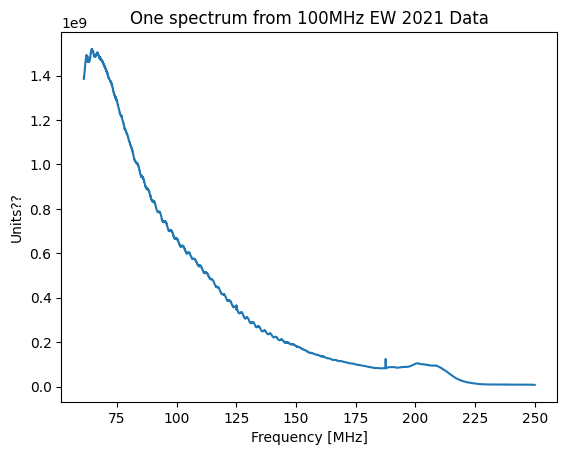

In [17]:
freqarray=np.linspace(0,250,len(testdata[0]))
# plt.plot(freqarray,testdata[0])
plt.plot(freqarray[1000:],testdata[3000,1000:])
# plt.imshow(testdata)
plt.title('One spectrum from 100MHz EW 2021 Data')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Units??')
plt.show()
# print(len(testdata))

In [ ]:
# Trying to use DataPrep
datapreptest = DataPrep(instrument='100MHz',channel='EW',year='2021')

In [53]:
caldata = datapreptest('GSM')

In [58]:
datamaybe = caldata[0]
print(datamaybe.shape)
lstmaybe = caldata[1]
print(lstmaybe.shape)

(165328, 4096)
(165328,)


### Testing analysis functions using test data downloaded from Niagara

In [2]:
# Data location
test_data_directory = '/home/lauriea/prizm/test_data/'
year = '2021'
instrument = '100'
channel = 'EW'

# test_data_path = test_data_directory + 'data' + '_' + year + '_' +
file_ending = '_' + year + '_' + instrument + channel + '.npy'

In [3]:
with open(test_data_directory + 'data' + file_ending, 'rb') as f:
    testdata = np.load(f)

In [4]:
print(testdata)

[[1.46750672e+11 2.47341228e+10 2.78847466e+08 ... 8.04723800e+06
  7.97381400e+06 7.73301200e+06]
 [1.49687317e+11 2.47532999e+10 2.79027434e+08 ... 8.02330600e+06
  7.99436600e+06 7.73434600e+06]
 [1.54156166e+11 2.47442212e+10 2.78885766e+08 ... 8.03373000e+06
  7.98416200e+06 7.73604600e+06]
 ...
 [1.49406462e+11 2.69378937e+10 2.53497296e+08 ... 7.98699400e+06
  7.98581400e+06 7.70532400e+06]
 [1.47830473e+11 2.69419964e+10 2.53849978e+08 ... 7.98077800e+06
  7.96805800e+06 7.71375400e+06]
 [1.53444785e+11 2.69468444e+10 2.53678626e+08 ... 8.00375200e+06
  7.97064000e+06 7.69163200e+06]]


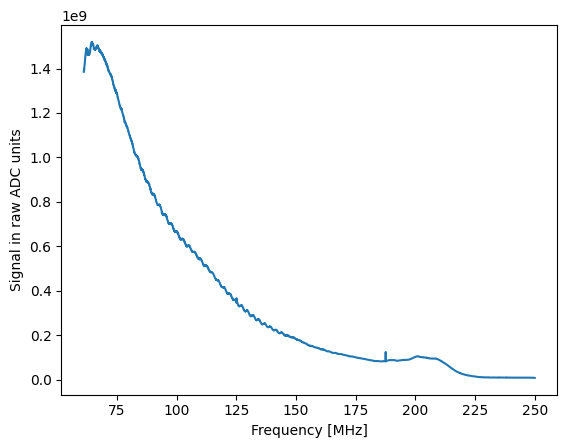

In [9]:
freqarray=np.linspace(0,250,len(testdata[0])) # from PRIZM instrument paper
plt.plot(freqarray[1000:],testdata[3000,1000:])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

In [3]:
# Using preprocess.py
preprocess = Preprocess(file_ending, test_data_directory)
data, lst, systime, day_splits = preprocess()

In [5]:
import preprocess as pp

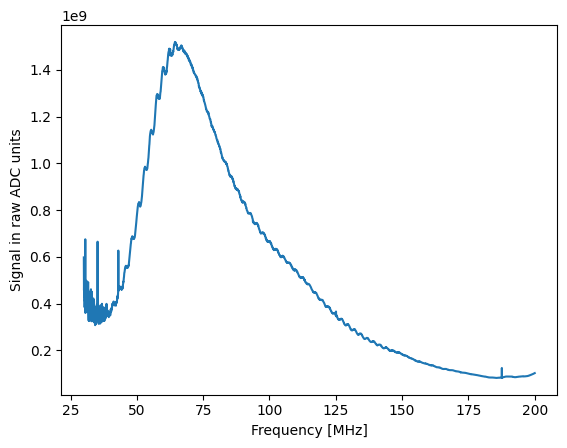

In [6]:
# freqarray=np.linspace(0,250,len(data[0])) # from PRIZM instrument paper
freqarray=pp.xrange()
plt.plot(freqarray,data[3000])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Signal in raw ADC units')
plt.show()

(165328, 2785)
[5.04370606e+08 3.60109868e+08 4.38271090e+08 ... 1.01272952e+08
 1.01539156e+08 1.02191860e+08]


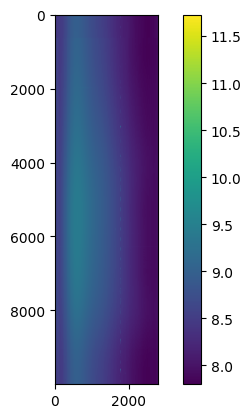

In [9]:
print(np.shape(data))
print(data[0])
plt.imshow(np.log10(data[5000:15000]))
plt.colorbar()
plt.show()

# 1. Sky Calibration Factors

In [1]:
import numpy as np
import statistics as stat
import scipy
from matplotlib import pyplot as plt
import PrizmCalibration as cl # this module is missing dependencies
from gsm_data import GSMData, get_desired_frequencies
from data_prep import DataPrep
from data_binning import *

In [2]:
# The data and calibration type I want to do
year = '2021'
instrument = '100MHz'
channel = 'EW'
calibration_type = 'GSM'

### 1.1. Preparing the data

Note: need to be on Niagara to retrieve data from Jon's project folder, as of now

In [3]:
# Step 1: use DataPrep to automatically retrieve data from the metadatabase, partition it,
# and convert UNIX times to LST
dataprep = DataPrep(instrument, channel, year)
data, lst, _ = dataprep(calibration_type=calibration_type) # this gets P_antenna - P_Short = P_Sky * eta

In [ ]:
# Optional: save output of dataprep to avoid having to retrieve the data again
# path2file = '../test_data/'
# file_end = '_2021_100EW.npy'
# arrays = [data, lst]
# names = ['data', 'lst']

# for i in range(len(names)):
#     np.save(path2file + names[i] + file_end, arrays[i])

In [4]:
# Optional: if you need to load in data that you've already saved
# path2file = '/home/lauriea/prizm/test_data/' # on local machine
path2file = '/home/s/sievers/lauriea/test_data/' # on Niagara
file_end = '_2021_100EW.npy'

with open(path2file + 'data' + file_end, 'rb') as f:
    data = np.load(f)
with open(path2file + 'lst' + file_end, 'rb') as f:
    lst = np.load(f)

In [4]:
# Step 2-3: Data truncation to 30-200 MHz (from PRIZM paper), and RFI flagging
RFI = RFI_flagging(data, lst)
RFI()
data = RFI.data
print(data.shape)
# Gives me crashes on local machine, but works on Niagara
RFI_record_data = RFI.data # record the data before binning for debugging purposes
RFI_record_lst = RFI.lst

/gpfs/fs1/home/s/sievers/lauriea/.virtualenvs/prizmenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/gpfs/fs1/home/s/sievers/lauriea/.virtualenvs/prizmenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


(165328, 2785)


In [5]:
# Optional: LST binning
# Here we do 2 mins/bin to match the GSM data
minperbin = 2
RFI.lst, RFI.data, _ = lst_binning(data,lst,minperbin)
lst = RFI.lst
data = RFI.data
print(data.shape)
print(lst.shape)

/gpfs/fs1/home/s/sievers/lauriea/prizm-analysis/data_binning.py:53: RuntimeWarning: Mean of empty slice
  data_binned[i] = np.nanmean(data[bin_inds == i], axis=0)


(720, 2785)
(720,)


In [6]:
# Optional: Frequency binning
def freq_binning(data, freq, binsize):
    '''
    Bins the data into frequency bins of specified width.
    
    Parameters
    ---------
    data: data unbinned in frequency
    freq: current frequency array corresponding to data, currently unused
    binsize: desired bin size for the binned data in MHz. Currently, works best for binsize=2.
    
    Note
    ----
    The frequency bins are only from 32 to 198 MHz due to boundary conditions. Subject to change.
    '''
    
    freqlow = np.arange(31, 200 - binsize / 2, binsize)
    freqhigh = np.arange(31 + binsize, 199 + binsize, binsize)
    freq_bin = (freqlow + freqhigh) / 2
    a = []
    for k in range(len(freqlow)):
        a.append(np.nanmean(data[:, f2i(freqlow[k]):f2i(freqhigh[k])], axis=1))
    data_binned = np.array(a).T
    
    return data_binned, freq_bin

# By default the data is in 4096 bins from 0 to 250 MHz, so ~250/4096=0.061 MHz bins.
# Binning down to 2 MHz for now because that's the default gsm code setting, subject to change.
RFI.data, RFI.freq = freq_binning(data=data,freq=RFI.freq,binsize=2)
freq = RFI.freq
data = RFI.data
print(data.shape)
print(freq.shape)

(720, 84)
(84,)


### 1.2. Analysis: Sky Cal Factors

In [7]:
# Step 0: Load in the GSM model temperatures, this can take a while to load
# minperbin = 2 # here you have to specify an LST bin width

g = GSMData(instrument, channel, minperbin)

In [9]:
# Step 1: Convolve the GSM model with the antenna beam. This gives the expected temperature T_GSM. 
# Is done automatically by GSMData when called.
# Retrieves simulated GSM temps, takes a while to run so it's in its own cell
Tgsm = g()

dict_keys(['theta', 'phi', 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0, 192.0, 194.0, 196.0, 198.0, 200.0, 'normalization'])
(37.81963888888889, -46.886944444444445)


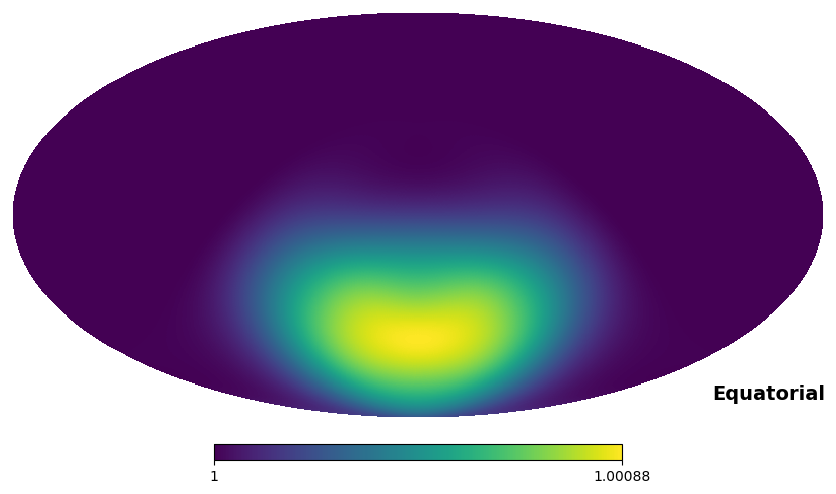

In [10]:
# Not necessary step -- just trying to visualize the healpy beam
import healpy as hp

def dms_to_ddd(degree,arcmin,arcsec,direction):
    '''
    Function converts from degree,arcmin,arcsec to decimal degree coordinates.

    Parameters
    -----------
    direction: cardinal direction that your dms is in, one of: 'N', 'S', 'E', 'W'.
    '''

    if direction == 'S' or direction == 'W':
        sign = -1
    elif direction == 'N' or direction == 'E':
        sign = +1
    else:
        print('Invalid cardinal direction given.')
        # change this to raiseWarning eventually

    arcmin_per_degree = 60
    arcsec_per_degree = 3600
    degree_decimal = sign*(degree+arcmin/arcmin_per_degree+arcsec/arcsec_per_degree)

    return degree_decimal

print(g.healpy_beam.keys())
site_coords = (dms_to_ddd(37,49,10.7,'E'),dms_to_ddd(46,53,13,'S')) # in degrees
print(site_coords)
hp.visufunc.mollview(10**(g.healpy_beam[100.0]/10),coord='C')
plt.title('')
plt.show()

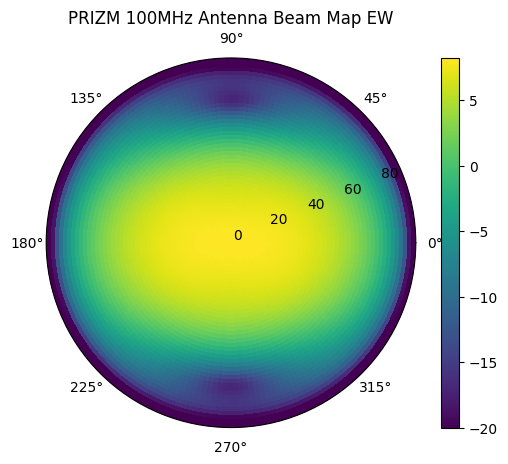

In [11]:
plt.style.use('default') # 'default' for regular style
# print(plt.style.available)
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
# 10**(g.beam_dict[40].T/10)
bm = ax.pcolormesh(g.beam_dict['phi'],g.beam_dict['theta']*180/np.pi,g.beam_dict[100].T,shading='auto',vmin=-20)
fig.colorbar(bm,ax=ax)
plt.title('PRIZM 100MHz Antenna Beam Map EW')
plt.show()

(86,)
86.0
(720,)
720.0


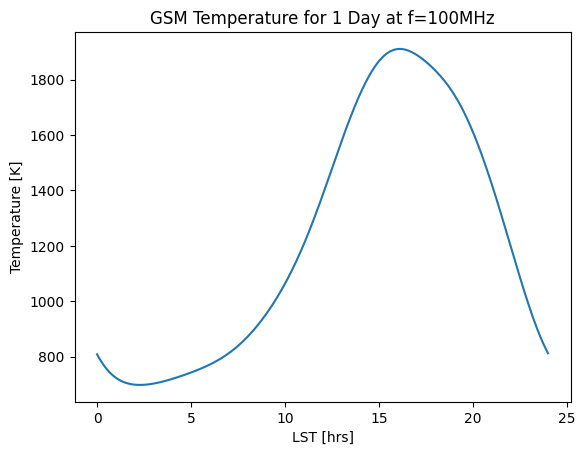

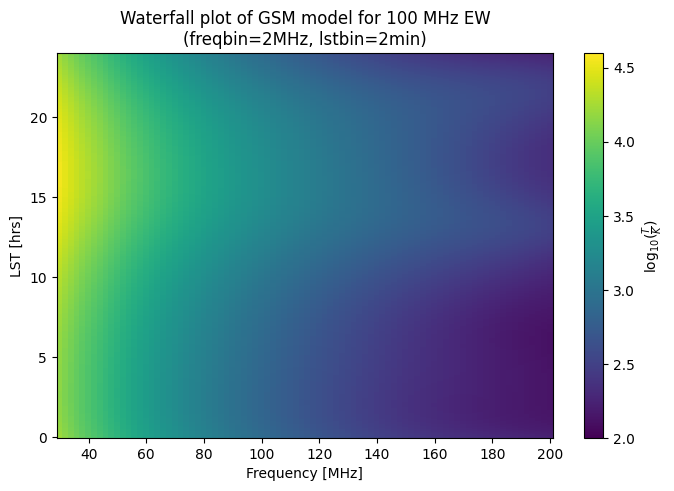

In [12]:
print(Tgsm[0].shape)
print((202-30)/2) # corresponds to number of frequency bins, 30-200 MHz in 2MHz bins

print(Tgsm[:,0].shape)
print(1440/2) # corresponds to number of LST bins, 24 hrs = 1440 mins in 2 min bins

# Plot Tgsm as a function of LST for a certain frequency
# freqind = 85 # freq index
# freqval = freqind*2+30 # actually freq value in MHz
# print('freq=',freqval)

# Inverse process (specify f then turn it into index)
freqval = 100 # MHz
freqind = int((freqval-30) / minperbin)

lst_arr = np.linspace(0,24,int(24*60/minperbin))
plt.plot(lst_arr,Tgsm[:,freqind]) # i = specifies time, j = specifies frequency
plt.xlabel('LST [hrs]')
plt.ylabel('Temperature [K]')
plt.title('GSM Temperature for 1 Day at f='+str(freqval)+'MHz')
plt.show()

# Waterfall plot
plt.figure(figsize=(8,5))
freq_arr = np.arange(30,202,2)
FF, LST = np.meshgrid(freq_arr,lst_arr)
# plt.imshow(Tgsm,aspect='equal')
plt.pcolormesh(FF,LST,np.log10(Tgsm),shading='auto',vmin=2,vmax=4.6)
plt.colorbar(label=r'$\log_{10}(\frac{T}{K})$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('Waterfall plot of GSM model for 100 MHz EW\n(freqbin=2MHz, lstbin=2min)')
plt.show()

In [13]:
# Step 2: Compute/find P_sky*eta from the data. P_sky is the antenna power coming from just the sky.
# P_Sky = (P_antenna - P_short) / eta
# This was already done in an above cell, ie 'data' == P_Sky * eta

In [6]:
# Step 3: Compute the transmission efficiency η (eta) from the data.
# Status: Work in progress -- not yet functional on 2021 files

# Example files, in practice we will want to interpolate or choose the VNA files taken closest to the measurement
# antenna_s11_file_path = '/project/s/sievers/prizm/prizm_vna_2021/100/2021-08-13-PRIZM-100-EW.txt'
# frontend_s11_file_path = '/project/s/sievers/prizm/prizm_vna_2021/100-LNA/2022-01-09-PRIZM-100-EW-LNA.txt'

antenna_s11_file_path = '/home/lauriea/prizm/test_data/2021-08-13-PRIZM-100-EW.txt'
frontend_s11_file_path = '/home/lauriea/prizm/test_data/2022-01-09-PRIZM-100-EW-LNA.txt'

cl.find_efficiency2(antenna_s11_file_path,frontend_s11_file_path,xsmooth=200) # !! Need to figure out proper xsmooth

Exception: A new case of VNA data formatting!

In [144]:
'''This step has been removed'''
# Step 4: Take a full sidereal day average of the T_GSM and subtract the time-independent 
# component from T_GSM. Do the same for T_sky = K_dGSM * P_Sky (the data).
# (For now we skip computing eta, the transmission efficiency (eta), and absorb it into K as a first pass)

# 4.1. GSM temperature
# Tgsm_dayavg = np.mean(Tgsm,axis=0)
# # print(Tgsm_dayavg.shape) # used to check the averaging was along the right axis
# dTgsm = Tgsm - Tgsm_dayavg # daily mean (time independent component) removed from Tgsm

# plt.plot(lst_arr,dTgsm[:,freqind]) # i = specifies time, j = specifies frequency
# plt.xlabel('LST [hrs]')
# plt.ylabel('Temperature [K]')
# plt.title('GSM Temperature for 1 Day at f='+str(freqval)+'MHz\n(Time dependent component subtracted)')
# plt.show()

'This step has been removed'

(720, 84)


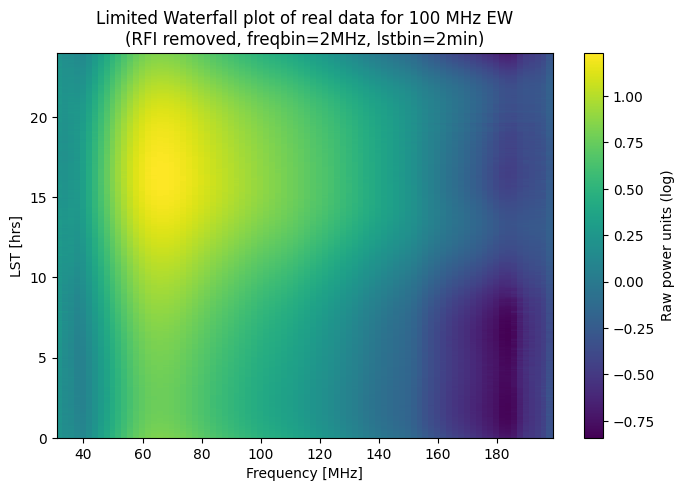

In [14]:
# Waterfall plot
plt.figure(figsize=(8,5))
freq_arr_data = RFI.freq
lst = RFI.lst
print(data.shape)
plot_slice = np.arange(0,3500,1).astype(int)
FFdata, LSTdata = np.meshgrid(freq_arr_data,lst[0:3500]) # when the max index is <3500, this just takes the full array
plt.pcolormesh(FFdata,LSTdata,np.log10(data[0:3500]),shading='auto')
plt.colorbar(label='Raw power units (log)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('Limited Waterfall plot of real data for 100 MHz EW\n(RFI removed, freqbin=2MHz, lstbin=2min)')
plt.show()

In [148]:
'''This step has been removed'''
# 4.2. taking day average of the real data and subtracting the time independent component
# In this code, the LST binning bins all LSTs into 24h with no regard for the day
# Psky_dayavg = np.mean()
# dPsky = 

'This step has been removed'

(720, 84)
(720, 84)


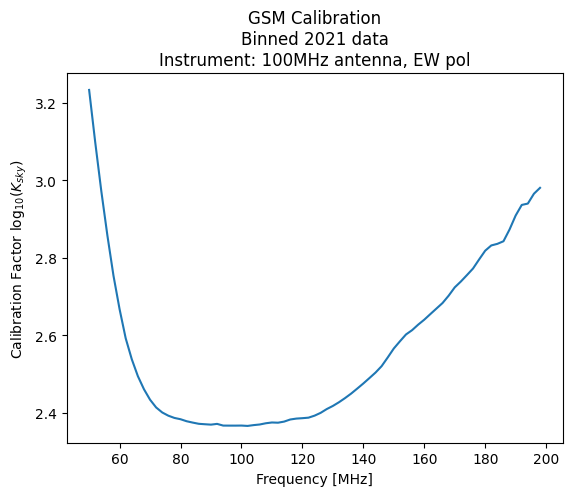

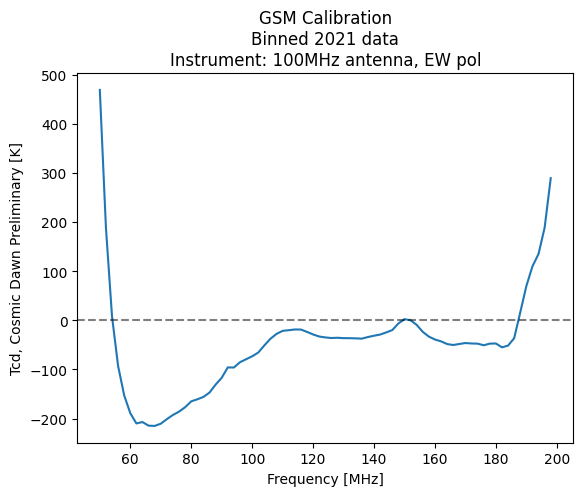

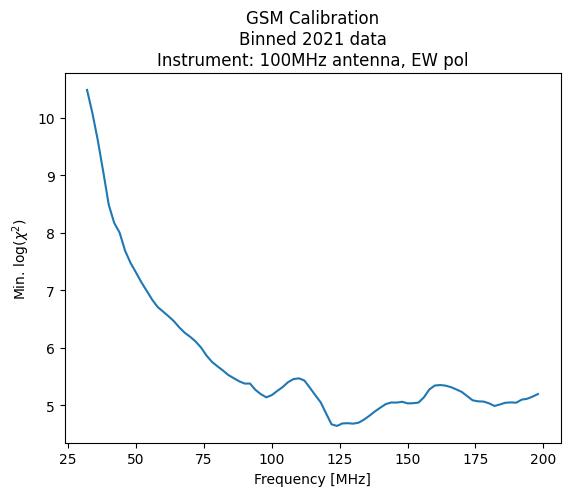

In [15]:
'''Step 5: Do a fit for K_dGSM at each frequency to get K_dGSM(nu).'''
chi2arr = np.zeros(len(freq_arr_data))
def chi2func (fitargs,Psky,TGSM,i):
    kappa, Tcd = fitargs # we fit for kappa and Tcd, where Tcd can vary with frequency but not with time, so is a constant here
    # Chi2 at a single frequency
    chi2 = np.sum((kappa*Psky - TGSM - Tcd)**2)
    chi2arr[i] = chi2
    return chi2

# Get rid of 30 MHz and 200 MHz so Tgsm dimensions match Psky
Tgsm_red = Tgsm[:,1:-1]
print(Tgsm_red.shape)
print(data.shape)

kappa_nu = np.zeros(len(freq_arr_data)) # empty arrays of kappa(nu)
Tcd_nu = np.zeros(len(freq_arr_data))
x0 = np.array([10**(-4.5),0]) # kappa, Tcd
options = {'disp': False} # used to set options for specific scipy.optimize.minimize methods

for i,ff in enumerate(freq_arr_data):
    rslt = scipy.optimize.minimize(fun=chi2func,x0=x0,args=(data[:,i],Tgsm_red[:,i],i),method='Nelder-Mead',options=options)
    kappa_nu[i], Tcd_nu[i] = rslt['x']
    
# Plot results:
# [int((50-32) / minperbin):int((150-32) / minperbin)]
freq_min = 50
freqind = int((freq_min-32) / minperbin)

# Plot calibration factor as a function of frequency
plt.plot(freq_arr_data[freqind:],np.log10(kappa_nu[freqind:]))
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'Calibration Factor $\log_{10}{(K_{sky})}$')
plt.title(str(calibration_type)+' Calibration\nBinned '+str(year)+' data\nInstrument: '+str(instrument)+' antenna, '+str(channel)+' pol')
plt.show()

# Plot Tcd as a function of frequency (we assumed it is constant with time, which it shoud be)
plt.plot(freq_arr_data[freqind:],Tcd_nu[freqind:])
plt.axhline(y=0,color='k',alpha=0.5,ls='--')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'Tcd, Cosmic Dawn Preliminary [K]')
plt.title(str(calibration_type)+' Calibration\nBinned '+str(year)+' data\nInstrument: '+str(instrument)+' antenna, '+str(channel)+' pol')
plt.show()

# Plot chi^2 as a function of frequency
plt.plot(freq_arr_data,np.log10(chi2arr))
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'Min. $\log(\chi^2)$')
plt.title(str(calibration_type)+' Calibration\nBinned '+str(year)+' data\nInstrument: '+str(instrument)+' antenna, '+str(channel)+' pol')
plt.show()

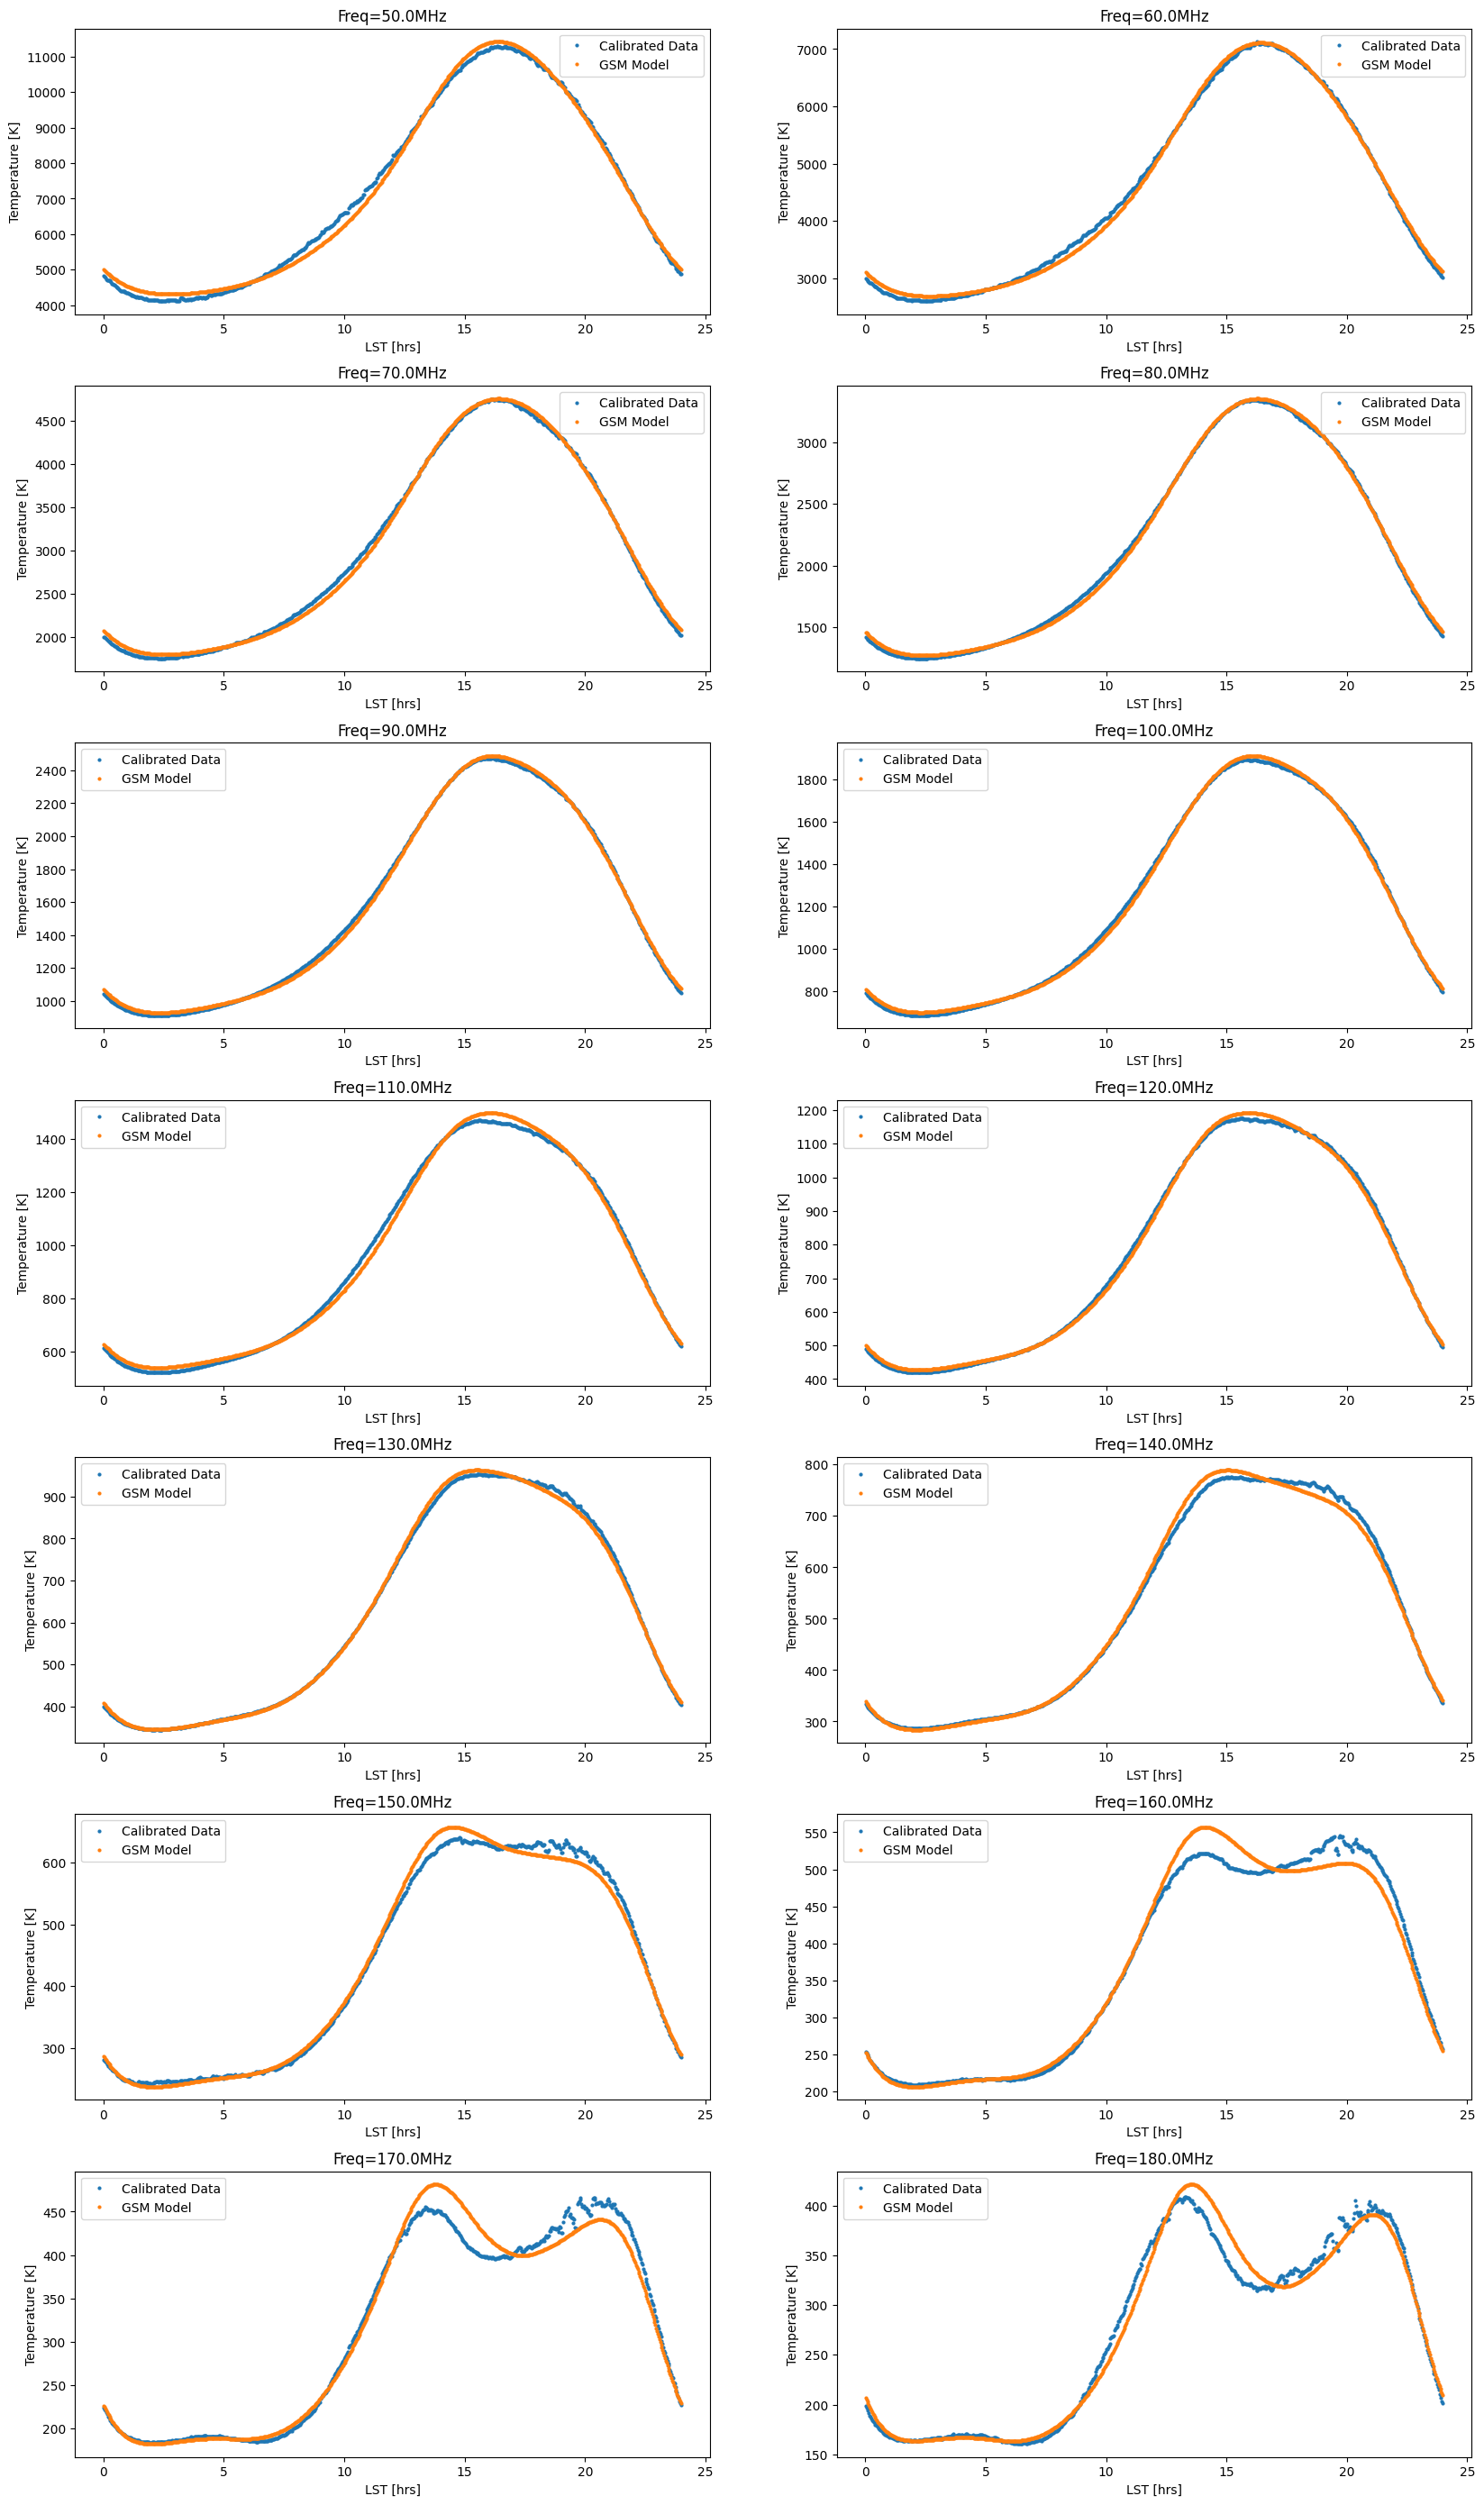

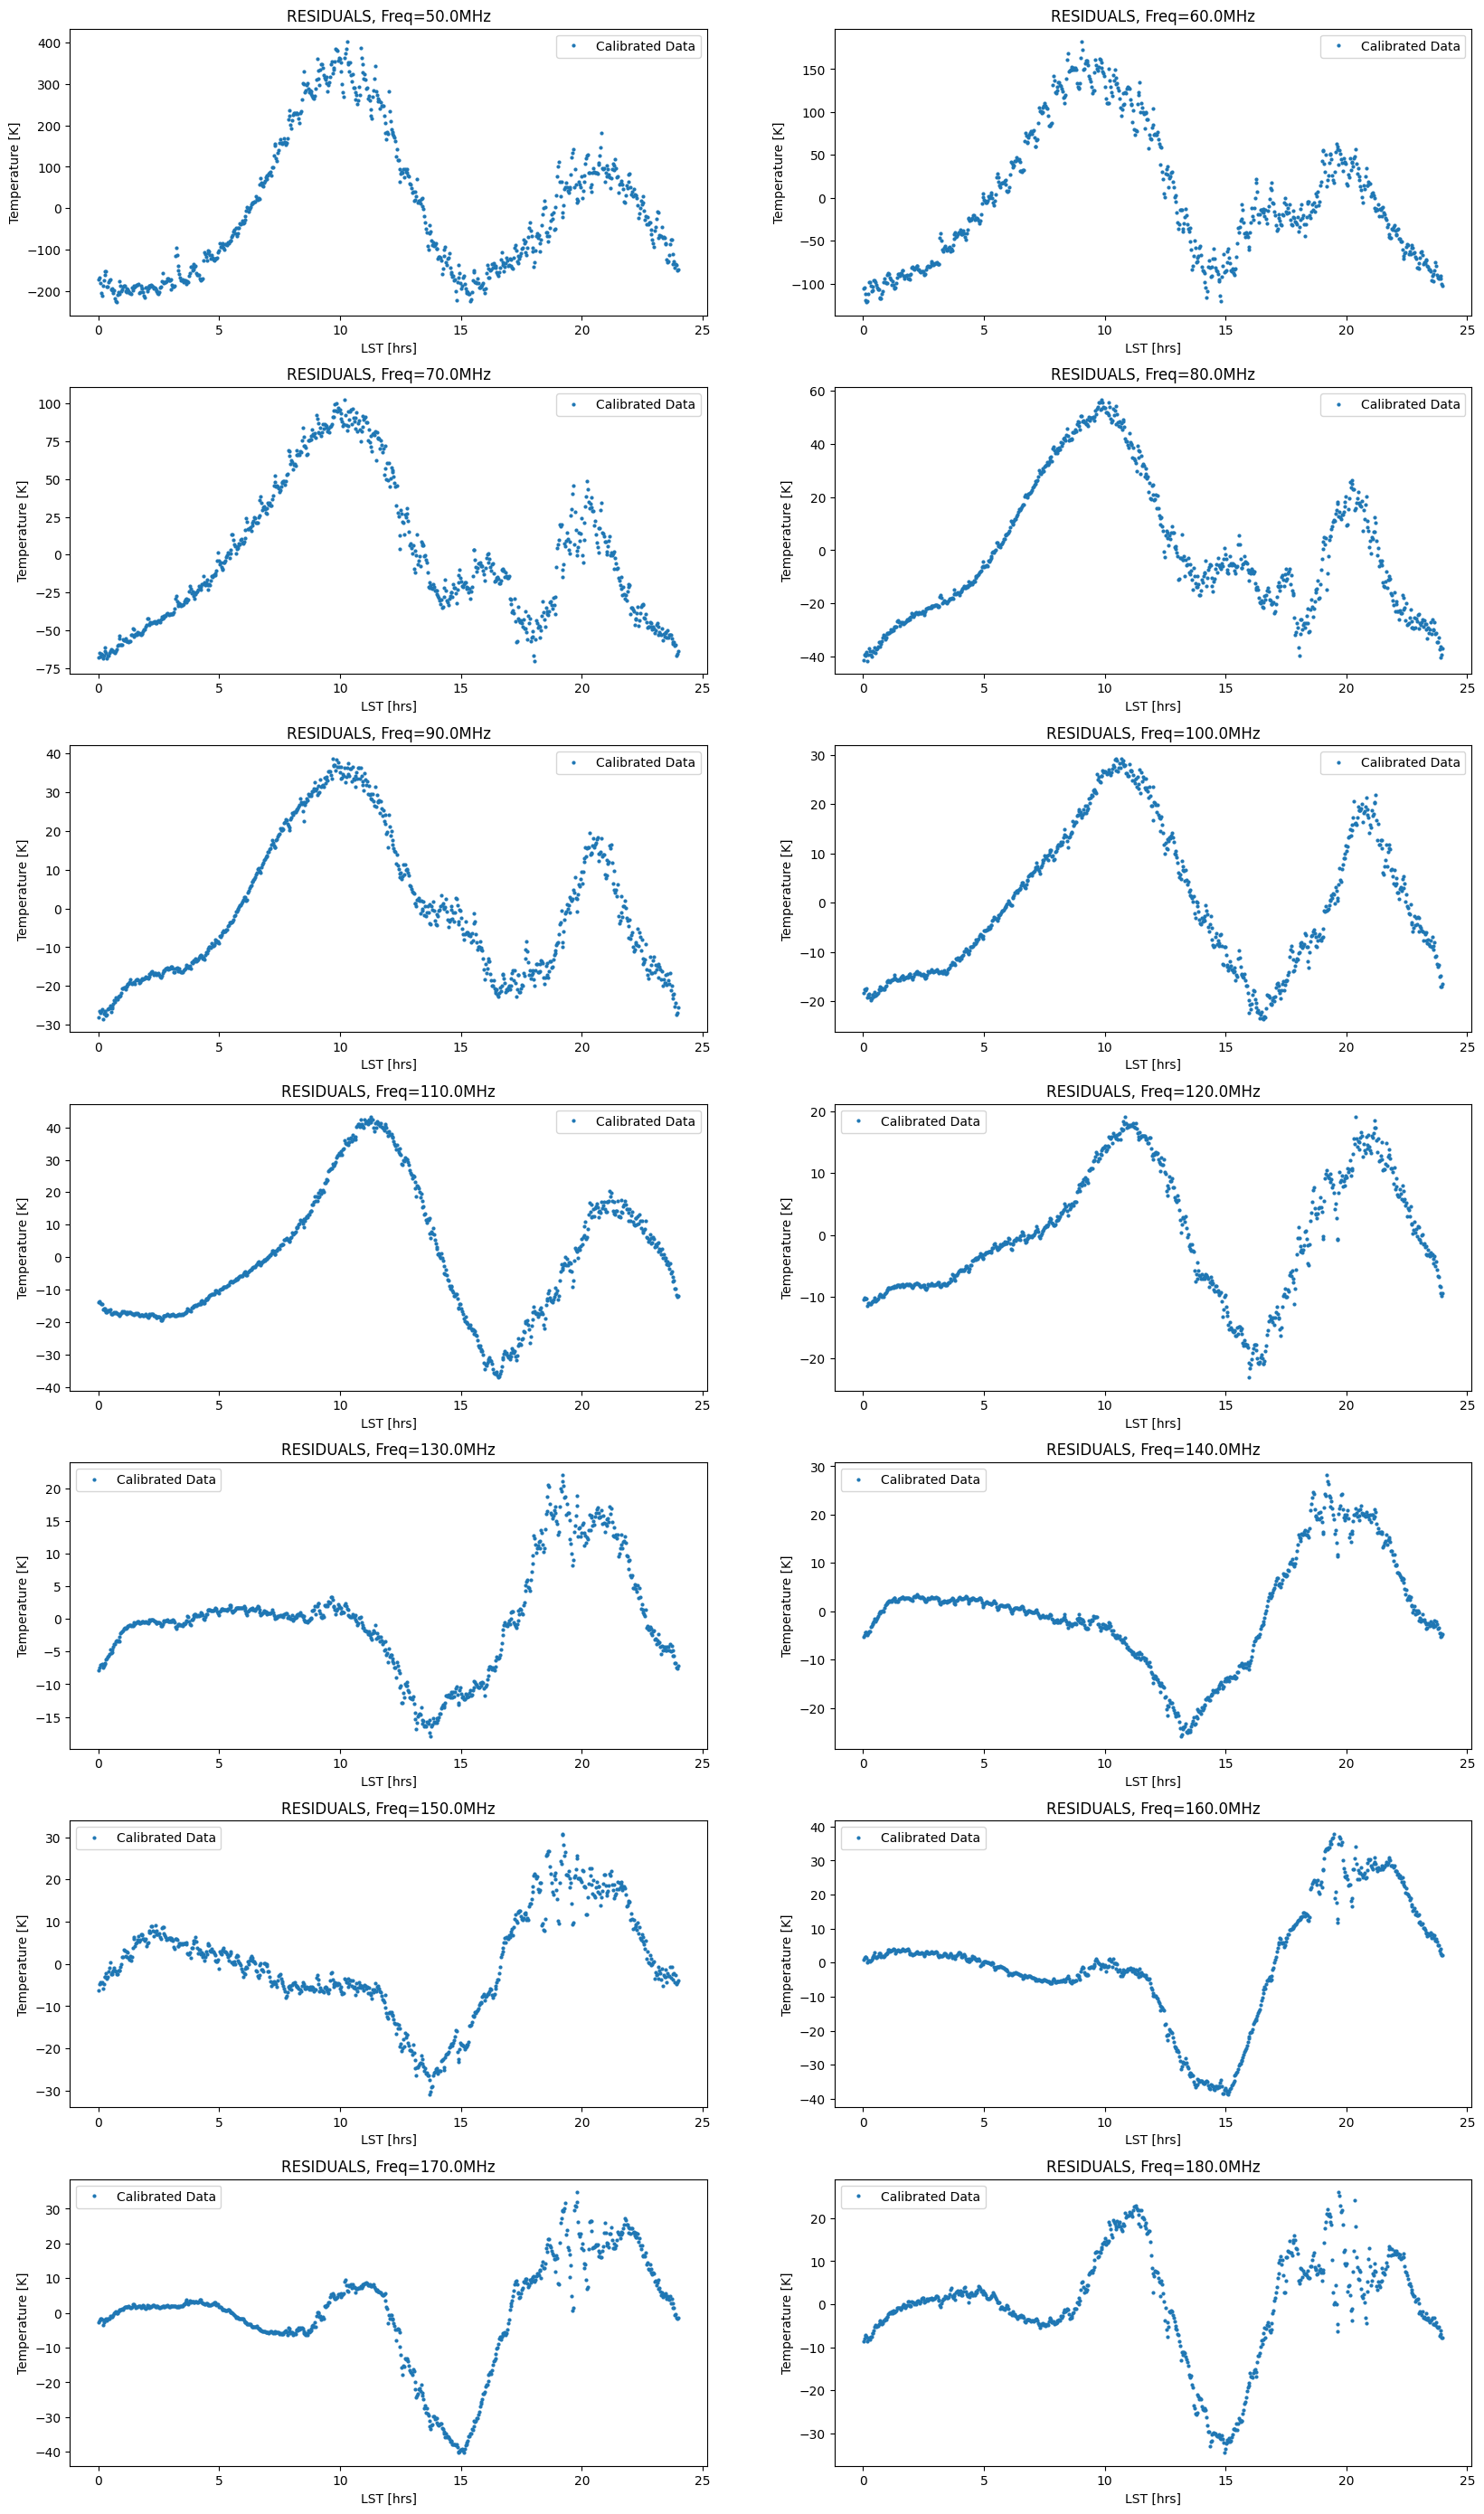

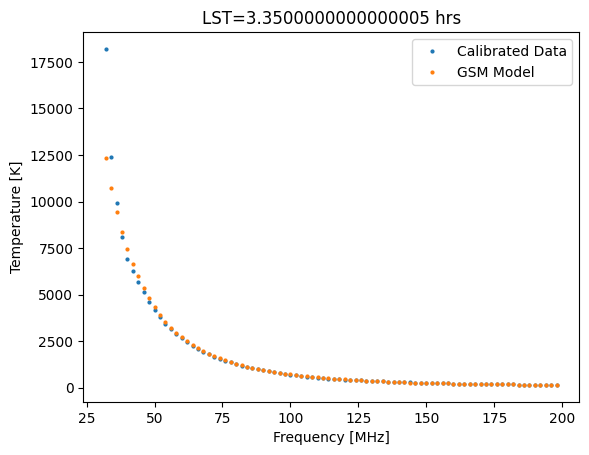

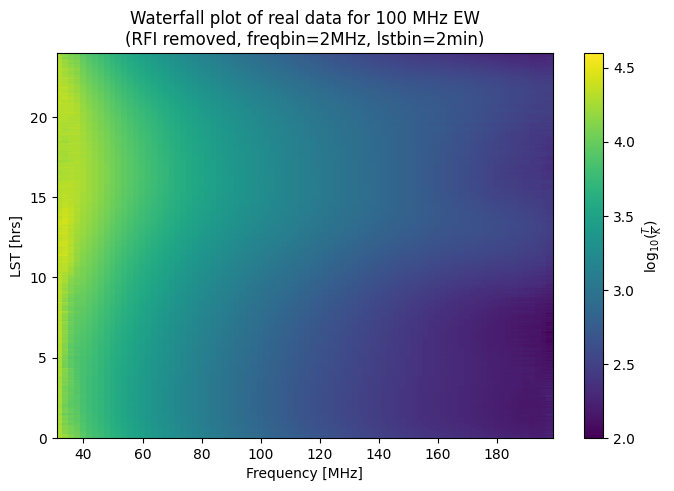

In [16]:
'''Step 6: Multiply the data P_sky by K_dGSM to get the calibrated data.'''

# Plot results at a certain frequency
freq_vals_plot = np.arange(50,190,10)
ncols=2
nrows=int(len(freq_vals_plot)/ncols)
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,35))

axs = axs.flatten() # makes iteration easier

for i in range(nrows*ncols):
    freqval = freq_vals_plot[i] # MHz
    freqind = int((freqval-32) / minperbin)

    axs[i].plot(lst,kappa_nu[freqind]*data[:,freqind]-Tcd_nu[freqind],ls='none',marker='o',ms='2',label='Calibrated Data')
    axs[i].plot(lst,Tgsm_red[:,freqind],ls='none',marker='o',ms='2',label='GSM Model')
    axs[i].set_xlabel('LST [hrs]')
    axs[i].set_ylabel('Temperature [K]')
    axs[i].set_title('Freq='+str(freq_arr_data[freqind])+'MHz')
    axs[i].legend()

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.show()

# # Plot residuals 
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,35))

axs = axs.flatten() # makes iteration easier

for i in range(nrows*ncols):
    freqval = freq_vals_plot[i] # MHz
    freqind = int((freqval-32) / minperbin)

    axs[i].plot(lst,(kappa_nu[freqind]*data[:,freqind]-Tcd_nu[freqind])-Tgsm_red[:,freqind],ls='none',marker='o',ms='2',label='Calibrated Data')
    axs[i].set_xlabel('LST [hrs]')
    axs[i].set_ylabel('Temperature [K]')
    axs[i].set_title('RESIDUALS, Freq='+str(freq_arr_data[freqind])+'MHz')
    axs[i].legend()

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.show()

# Plot all freqs at a certain LST, comparing calibrated data to GSM:
lst_plot_ind = 100
plt.plot(freq_arr_data,kappa_nu*data[lst_plot_ind]-Tcd_nu,ls='none',marker='o',ms='2',label='Calibrated Data')
plt.plot(freq_arr_data,Tgsm_red[lst_plot_ind],ls='none',marker='o',ms='2',label='GSM Model')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'Temperature [K]')
plt.title('LST='+str(lst[lst_plot_ind])+' hrs')
plt.legend()
plt.show()

# Waterfall plot
plt.figure(figsize=(8,5))
plt.pcolormesh(FFdata,LSTdata,np.log10(data[0:3500]*kappa_nu-Tcd_nu),shading='auto',vmin=2,vmax=4.6)
plt.colorbar(label=r'$\log_{10}(\frac{T}{K})$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('Waterfall plot of real data for 100 MHz EW\n(RFI removed, freqbin=2MHz, lstbin=2min)')
plt.show()

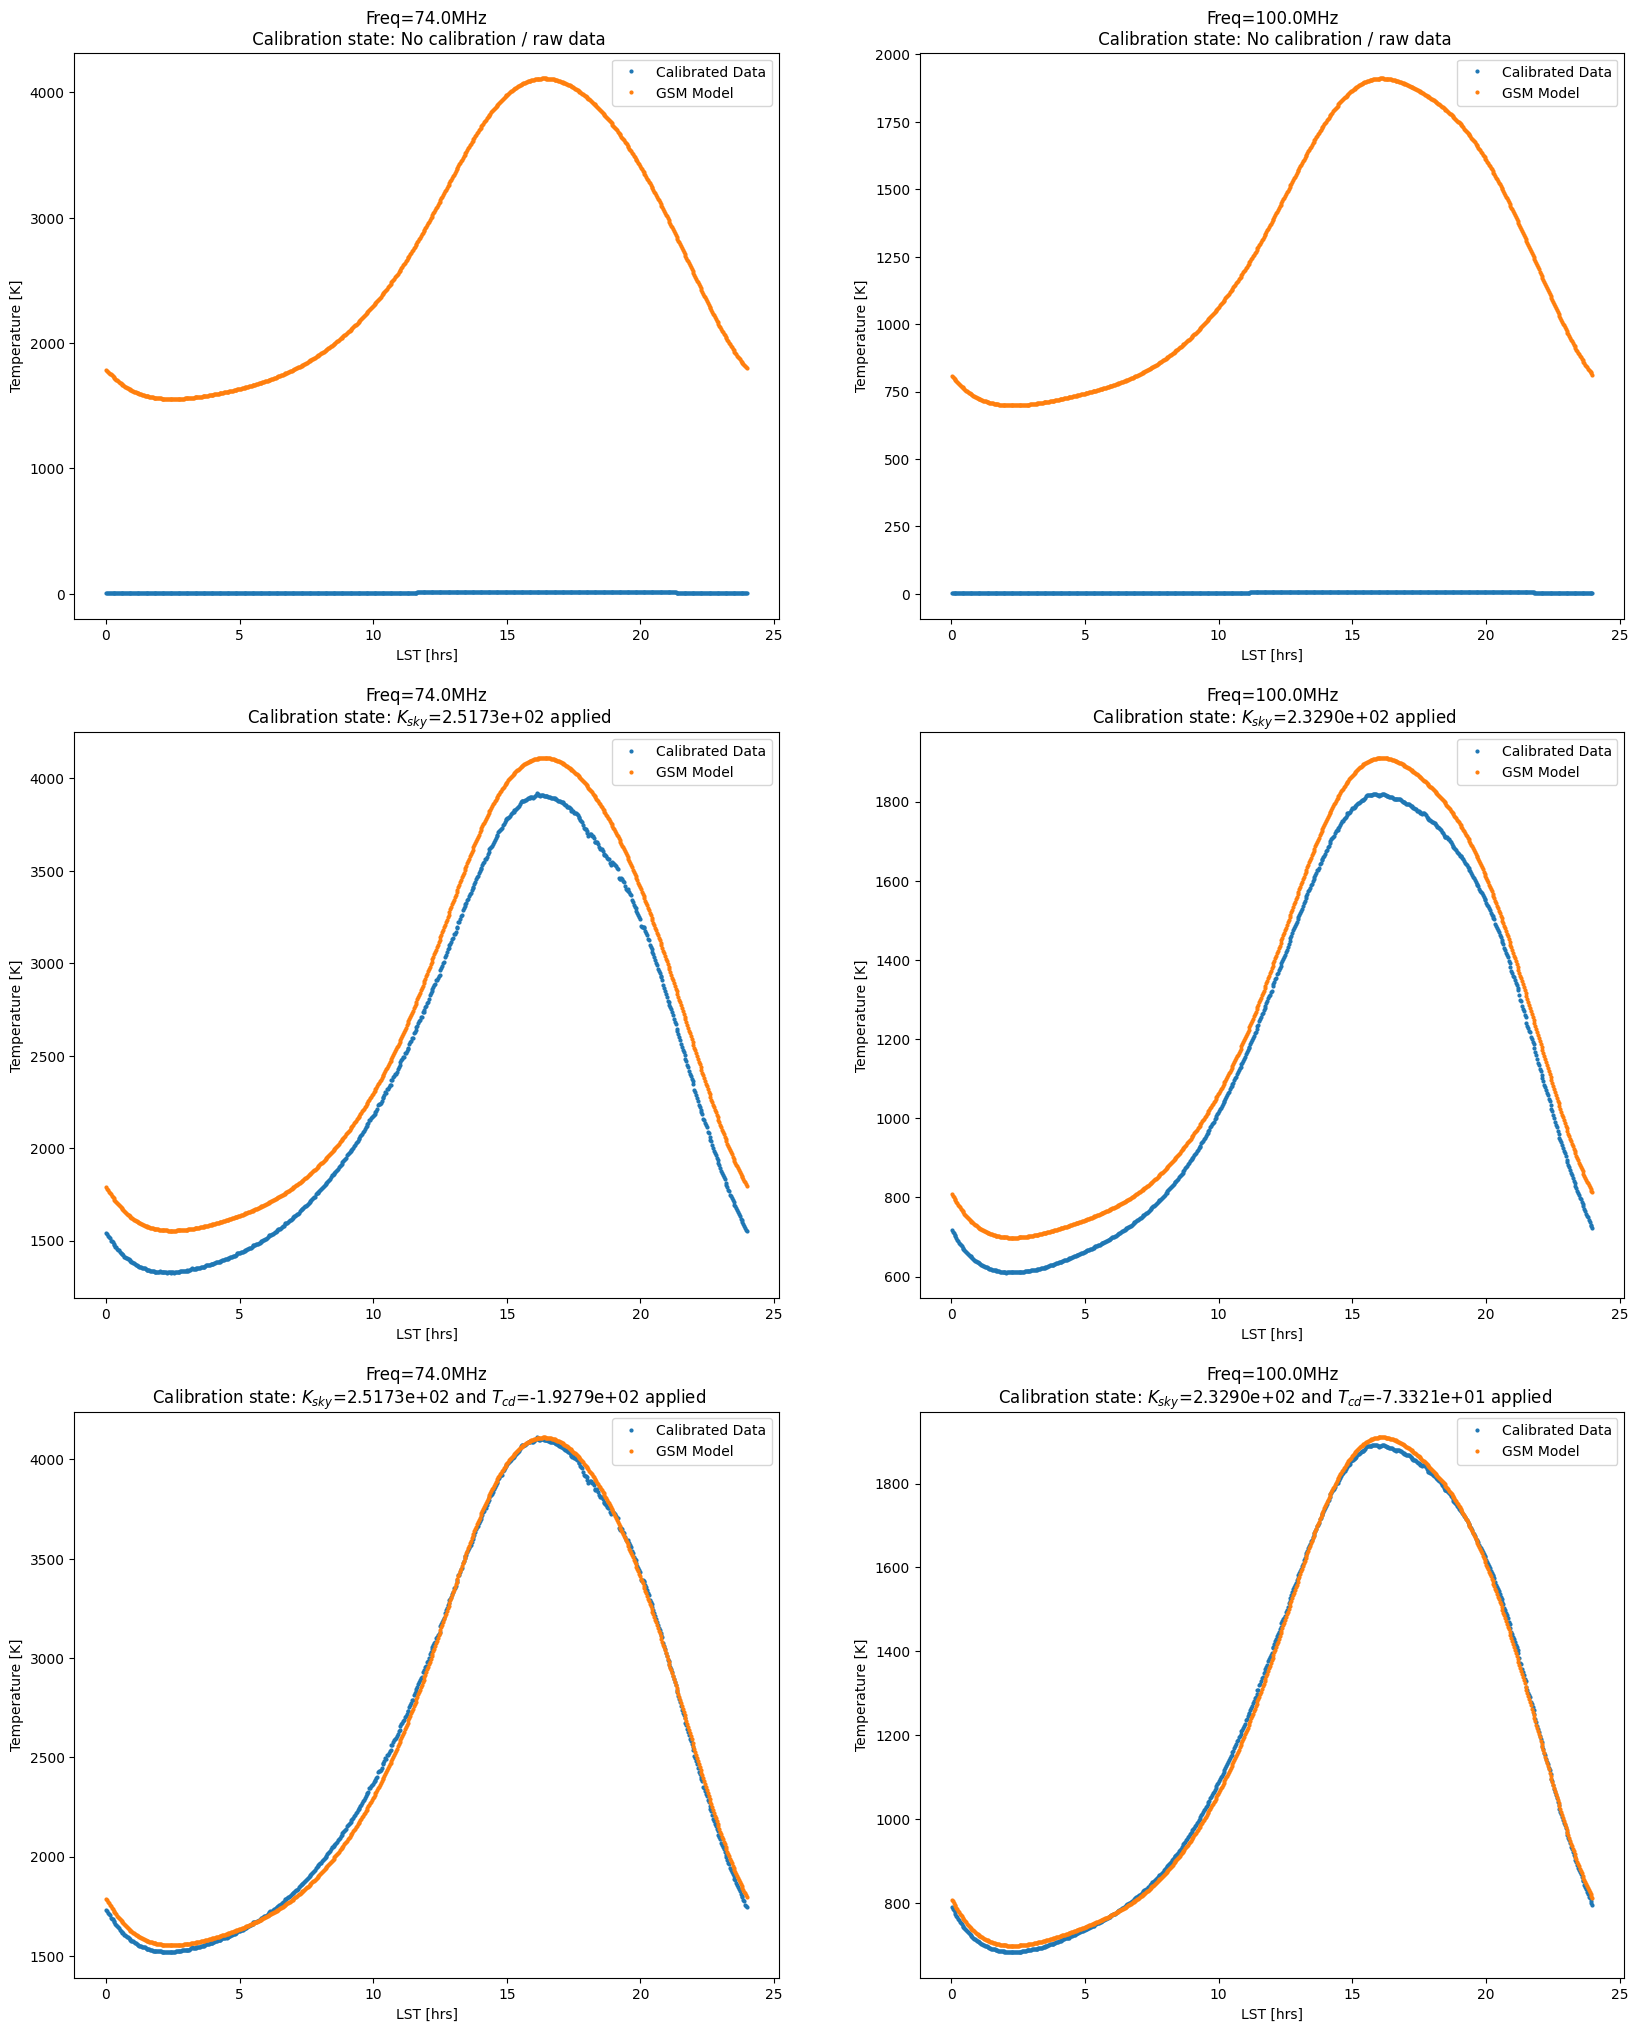

In [17]:
# Reconstructing the fit one term at a time
freq_rec = np.array([75,100]) # MHz

# Initial, calibration not done
ncols=2
nrows=3
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,25))

for i in range(len(freq_rec)):
    freqval = freq_rec[i] # MHz
    freqind = int((freqval-32) / minperbin)

    axs[0,i].plot(lst,data[:,freqind],ls='none',marker='o',ms='2',label='Calibrated Data')
    axs[0,i].plot(lst,Tgsm_red[:,freqind],ls='none',marker='o',ms='2',label='GSM Model')
    axs[0,i].set_xlabel('LST [hrs]')
    axs[0,i].set_ylabel('Temperature [K]')
    axs[0,i].set_title('Freq='+str(freq_arr_data[freqind])+'MHz\n Calibration state: No calibration / raw data')
    axs[0,i].legend()

    axs[1,i].plot(lst,data[:,freqind]*kappa_nu[freqind],ls='none',marker='o',ms='2',label='Calibrated Data')
    axs[1,i].plot(lst,Tgsm_red[:,freqind],ls='none',marker='o',ms='2',label='GSM Model')
    axs[1,i].set_xlabel('LST [hrs]')
    axs[1,i].set_ylabel('Temperature [K]')
    axs[1,i].set_title('Freq='+str(freq_arr_data[freqind])+'MHz\n Calibration state: $K_{sky}$='+"{:.4e}".format(kappa_nu[freqind])+' applied')
    axs[1,i].legend()
    
    axs[2,i].plot(lst,data[:,freqind]*kappa_nu[freqind]-Tcd_nu[freqind],ls='none',marker='o',ms='2',label='Calibrated Data')
    axs[2,i].plot(lst,Tgsm_red[:,freqind],ls='none',marker='o',ms='2',label='GSM Model')
    axs[2,i].set_xlabel('LST [hrs]')
    axs[2,i].set_ylabel('Temperature [K]')
    axs[2,i].set_title('Freq='+str(freq_arr_data[freqind])+'MHz\n Calibration state: $K_{sky}$='+"{:.4e}".format(kappa_nu[freqind])+' and $T_{cd}$='+"{:.4e}".format(Tcd_nu[freqind])+' applied')
    axs[2,i].legend()
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

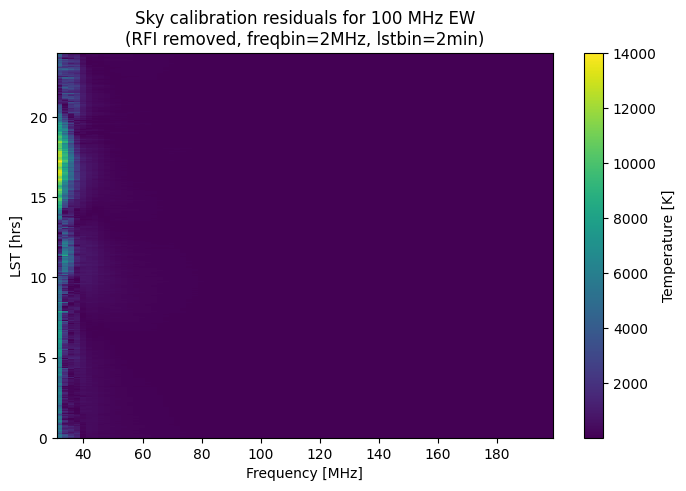

In [18]:
# Waterfall residuals plot between GSM and calibrated data:
plt.figure(figsize=(8,5))
plt.pcolormesh(FFdata,LSTdata,np.abs(data[0:3500]*kappa_nu - Tcd_nu - Tgsm[:,1:-1]),shading='auto')
plt.colorbar(label=r'Temperature [K]')
plt.xlabel('Frequency [MHz]')
plt.ylabel('LST [hrs]')
plt.title('Sky calibration residuals for 100 MHz EW\n(RFI removed, freqbin=2MHz, lstbin=2min)')
plt.show()

### 1.3. Plots of Calibration Sources

short, 50 Ohm, 100 Ohm

In [2]:
import numpy as np
import statistics as stat
import scipy
from matplotlib import pyplot as plt
import PrizmCalibration as cl # this module is missing dependencies
from gsm_data import GSMData, get_desired_frequencies
from data_prep import DataPrep
from data_binning import *

In [3]:
# The data and calibration type I want to do
year = '2021'
instrument = '100MHz'
channel = 'EW'
calibration_type = 'GSM'

In [ ]:
dataprep = DataPrep(instrument, channel, year)
data, lst, _ = dataprep(calibration_type=calibration_type) # this gets P_antenna - P_Short = P_Sky * eta

In [83]:
def LST_days_split(lst,data):
    '''
    This function splits data as a function of LST into separate arrays for each day (0 to 24h cycles).
    
    Parameters
    -----------
    lst: array of lst values for each point in data
    data: 1d or 2d data that is a function of LST in the 1st dimension (and possibly frequency in the 2nd dimension)
    
    Returns
    -----------
    lst_split: array of lst values split into each day
    data_split: data array split into each day's data
    '''
    cutoffs, _ = scipy.signal.find_peaks(lst)
    lst_split = np.split(lst,cutoffs,axis=0)
    data_split = np.split(data,cutoffs,axis=0)
    return lst_split, data_split

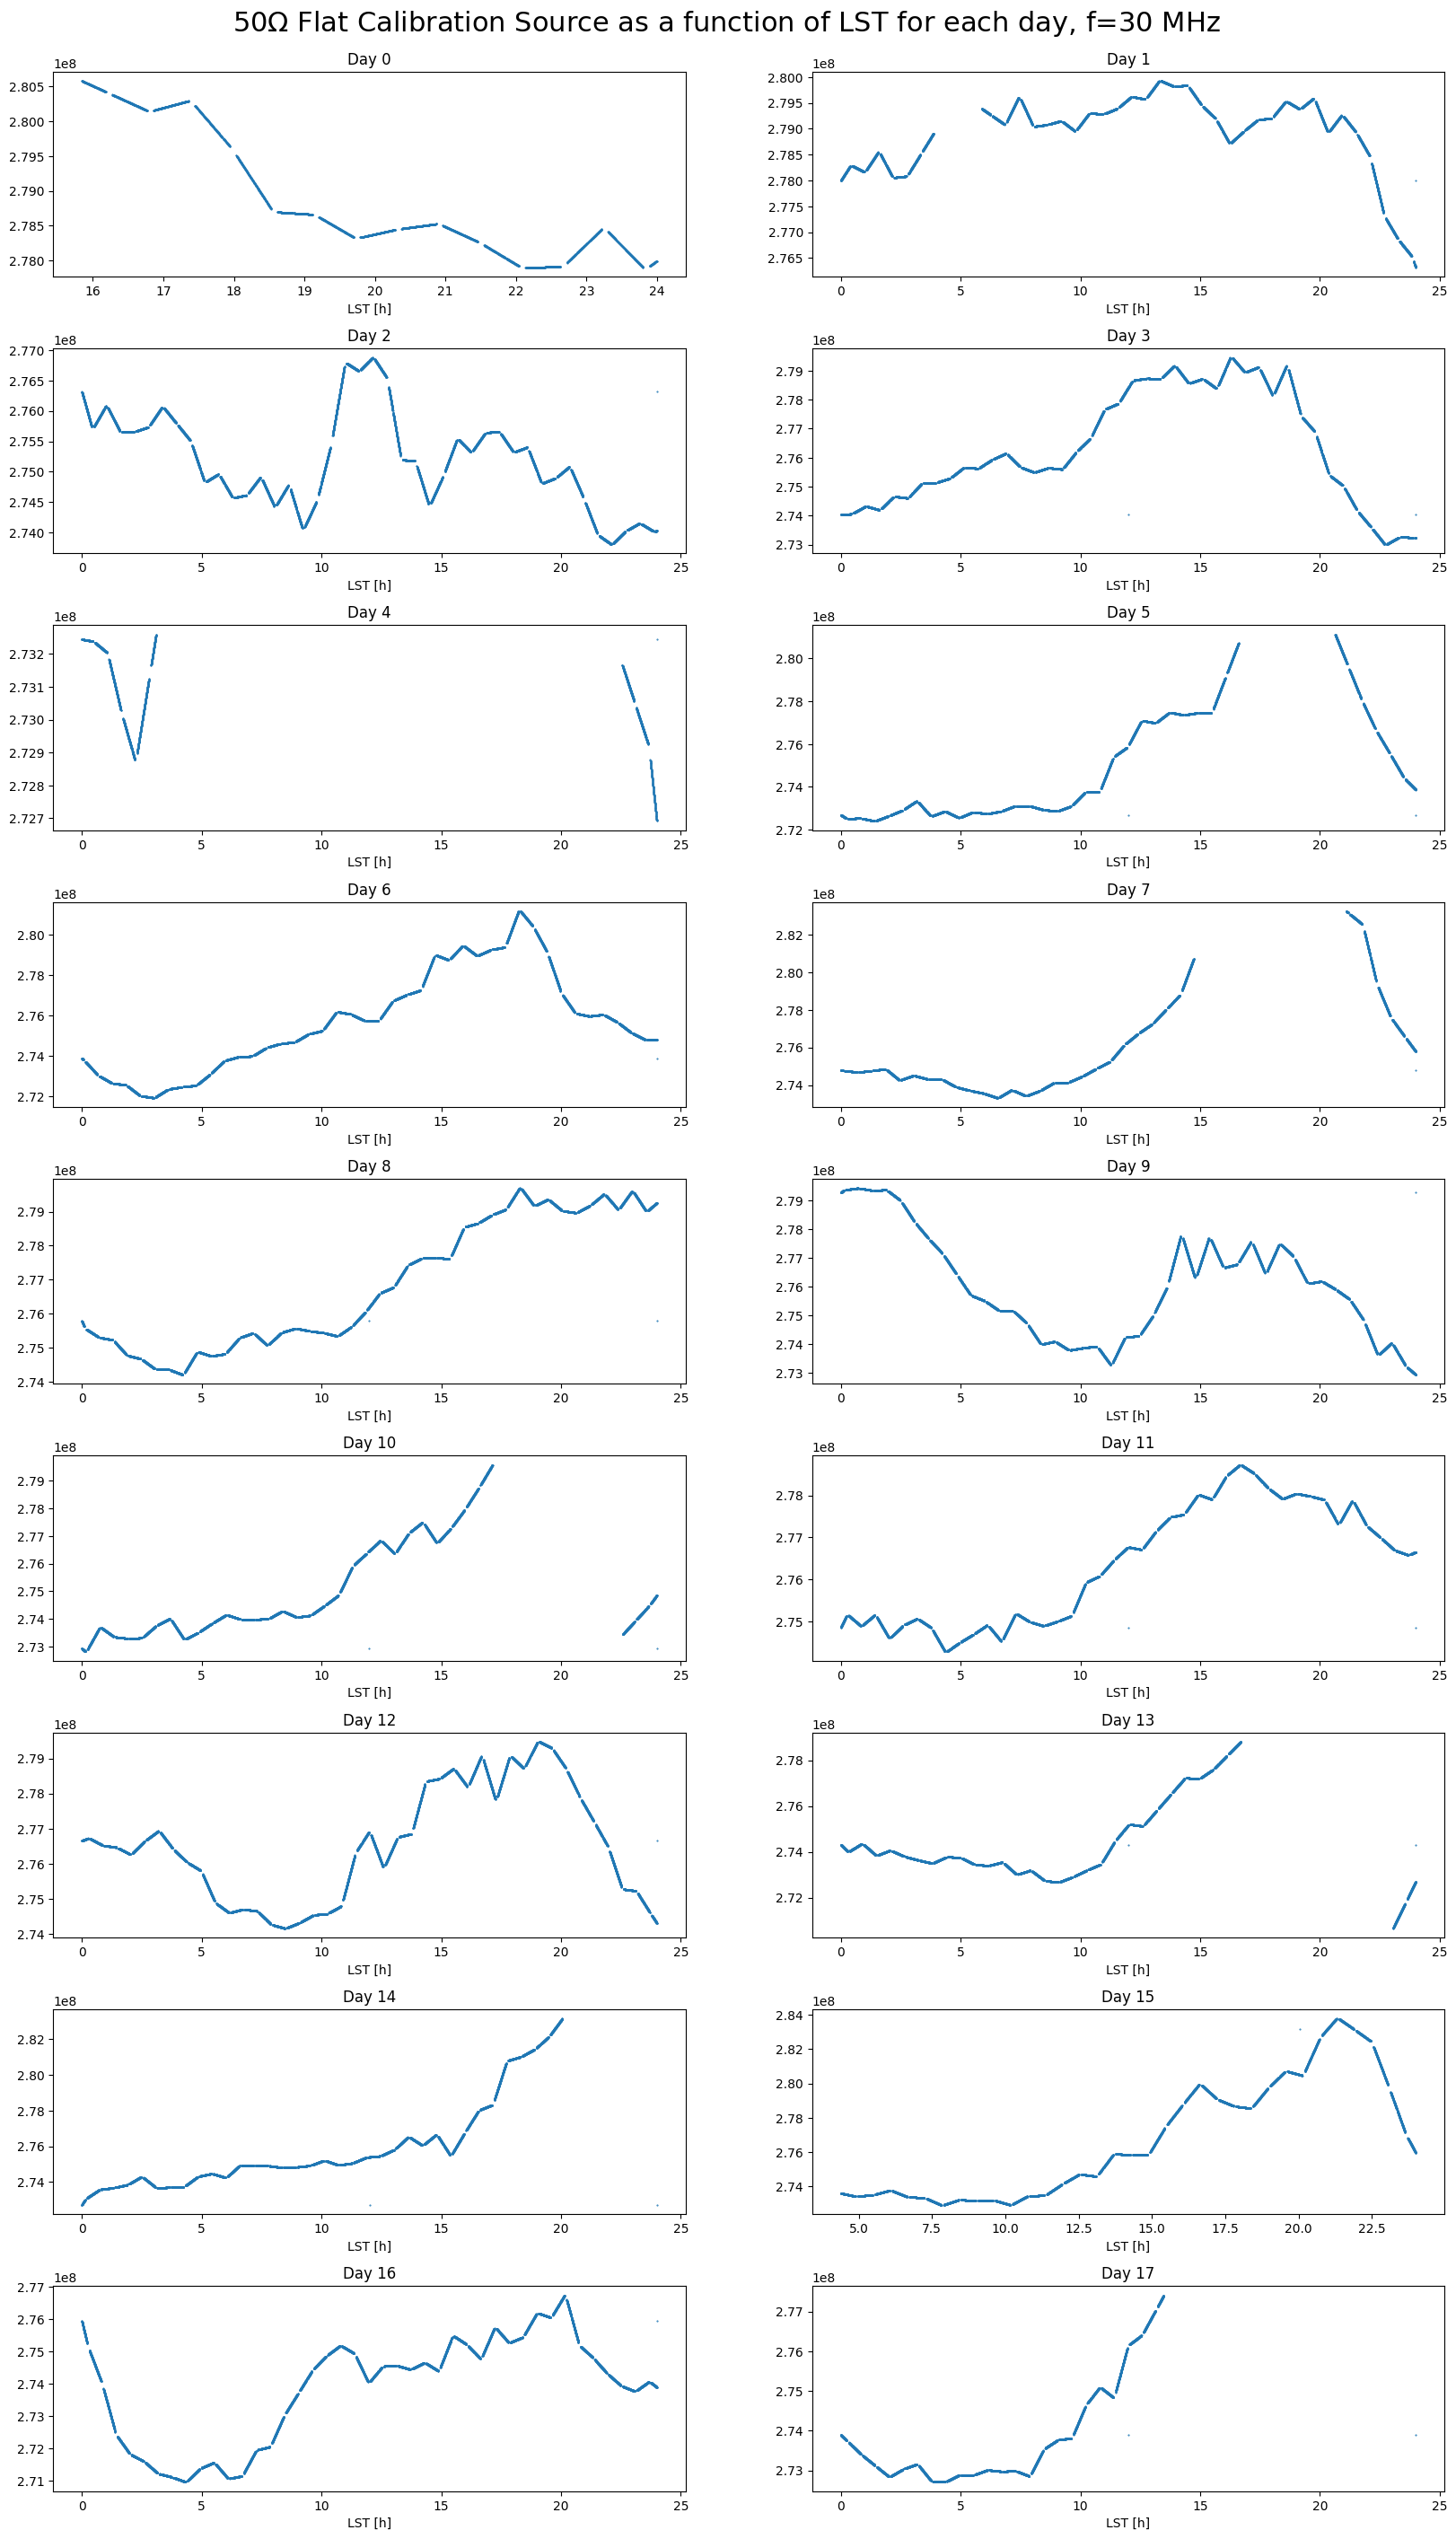

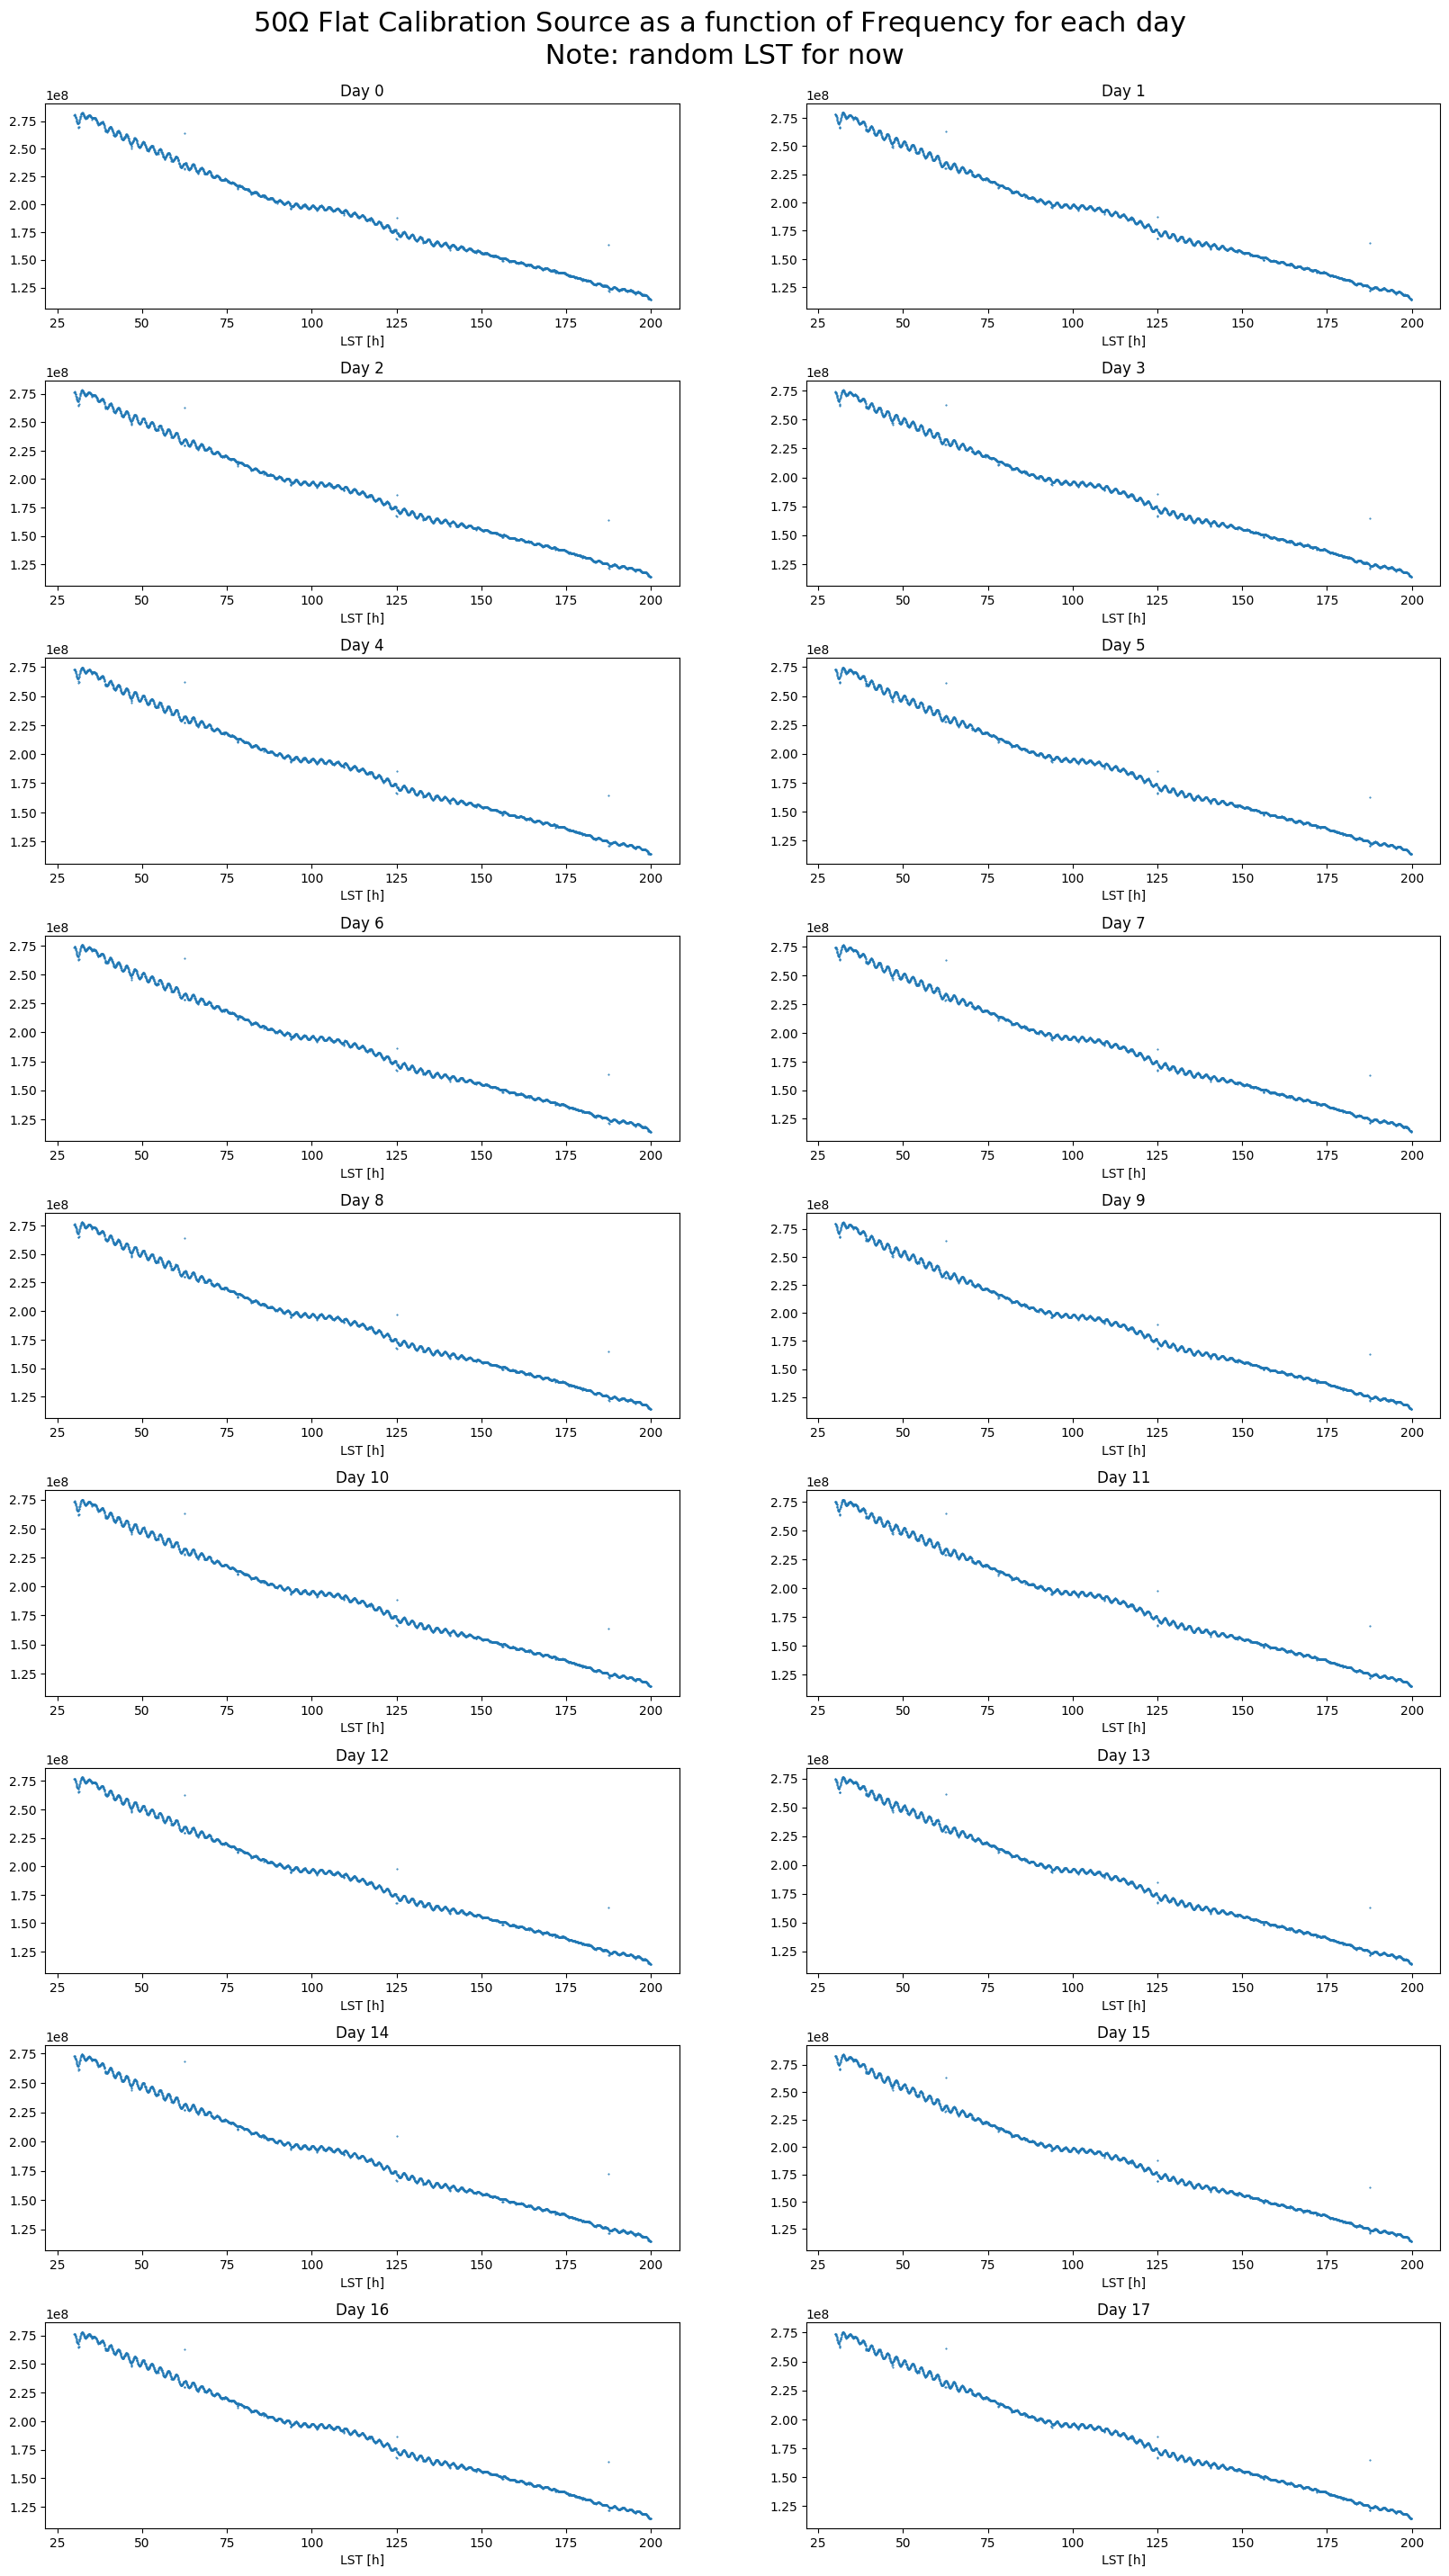

In [129]:
# 50 Ohm data, as a function of LST and frequency
data50 = dataprep.res50
lst50 = dataprep.lst
freqarr50, freqstep = np.linspace(0,250,4096,retstep=True)
minfreq = 30
maxfreq = 200
minfreqarg = int(minfreq/freqstep)
maxfreqarg = int(maxfreq/freqstep)

# Before splitting into days
# plt.plot(lst50,data50[:,minfreqarg],ls='none',marker='o',ms=0.5)
# plt.xlabel('LST [h]')
# plt.show()

# Split into days
lst50_split, data50_split = LST_days_split(lst50,data50)

# After splitting into days
ncols = 2
nrows = int(len(lst50_split)/ncols)

# Plot as a function of LST
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,35))
axs = axs.flatten() # makes iteration easier

for i in range(len(lst50_split)):
    axs[i].plot(lst50_split[i],data50_split[i][:,minfreqarg],ls='none',marker='o',ms=0.5,label='Day '+str(i))
    axs[i].set_xlabel('LST [h]')
    axs[i].set_title('Day '+str(i))

plt.subplots_adjust(hspace=0.35)
plt.suptitle(r'50$\Omega$ Flat Calibration Source as a function of LST for each day, f=30 MHz',y=0.9,fontsize=22)
plt.show()

# Plot as a function of frequency
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,35))
axs = axs.flatten() # makes iteration easier

for i in range(len(lst50_split)):
    axs[i].plot(freqarr50[minfreqarg:maxfreqarg],data50_split[i][0,minfreqarg:maxfreqarg],\
                ls='none',marker='o',ms=0.5,label='Day '+str(i))
    axs[i].set_xlabel('LST [h]')
    axs[i].set_title('Day '+str(i))

plt.subplots_adjust(hspace=0.35)
plt.suptitle('50$\Omega$ Flat Calibration Source as a function of Frequency for each day \n Note: random LST for now',y=0.91,fontsize=22)
plt.show()

In [1]:
# Taking just Day 1
# Want LST in 60 min / 1 hour intervals
data50_d1 = data50_split[1]
lst50_d1 = lst50_split[1]
minperbin = 60
print(len(lst50_split))

lst50_d1_bins, data50_d1_binned, _  = lst_binning(data50_d1,lst50_d1,binsize=minperbin)

ncols = 1
nrows = int(len(lst50_d1_bins)/ncols)
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(5,35),sharex=True,sharey=True)
axs = axs.flatten() # makes iteration easier

for i in range(len(lst50_d1_bins)):
    axs[i].plot(freqarr50[minfreqarg:maxfreqarg],data50_d1_binned[i,minfreqarg:maxfreqarg],\
                label='LST='+str(lst50_d1_bins[i])+' hrs')
    axs[i].legend()

plt.xlabel('Frequency [MHz]')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Day 1, 50 $\Omega$',y=0.89)
plt.show()

NameError: name 'data50_split' is not defined

In [ ]:
# Make this plotting scheme into a function:
def plot_alldays(data,lst,freqarr):
    '''
    1. Splits data into days,
    2. Bins each day into 1h bins,
    3. For each day, makes a plot showing the data as a function of frequency for each 1h LST bins.
    '''
    
    # 1. Split data into days
    lst_split, data_split = LST_days_split(lst,data)
    
    # 2. Bin each day into 1h bins
    n_days = 
    
    return